In [48]:

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM7', 9600, timeout=2)
dut.connect(ser)

In [49]:
dut.power_on()
dut.reset_chip()
dut.reset_dpe()

Setting vrefs to default


In [63]:
dut.power_off()

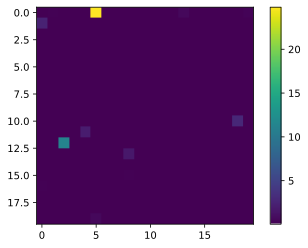

In [58]:
arr = 
numRows = 5
numCols = 5
vRead = 0.2
vReadGate = 5.0
Gmap2post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, gain=-1)
            Gmap2post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2post)
plt.colorbar()

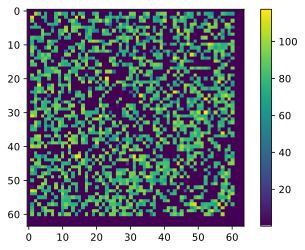

In [53]:
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
Gmap = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=-1) 
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, gain=-1)
            Gmap[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap)
plt.colorbar()

In [64]:
dut.disconnect()

In [65]:
from dpe import DPE
dpe = DPE('COM7')

Running <function DPE.init_dut at 0x10425F18> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[INFO] Elapsed time = 0.03s
Serial disconnected


In [66]:
dpe.set_clock(50)

Running <function DPE.set_clock at 0x10425FA8> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected


Running <function DPE.read at 0x10452078> with serial
[INFO] Elapsed time = 0.40s
Serial disconnected


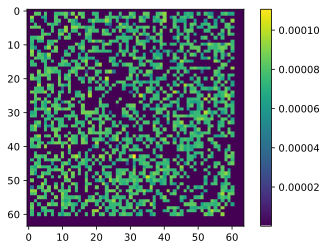

In [25]:
plt.imshow(dpe.read(0))
plt.colorbar()

In [26]:
g=dpe.read(0)

Running <function DPE.read at 0x10452078> with serial
[INFO] Elapsed time = 0.25s
Serial disconnected


(6e-05, 0.0001)

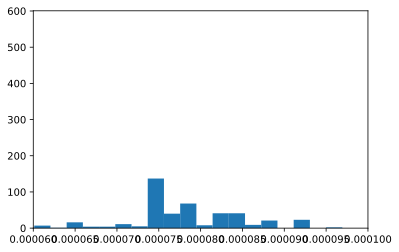

In [45]:
_= plt.hist(g[:, :16].reshape(-1, 1), bins=50)

plt.xlim(60e-6, 100e-6)

In [43]:
g[1:9,1:9]

array([[3.42130987e-08, 8.32518736e-05, 8.20259042e-05, 3.42130987e-08,
        8.16837732e-05, 3.42130987e-08, 3.42130987e-08, 7.58675464e-05],
       [9.23753666e-05, 3.42130987e-08, 3.42130987e-08, 5.73924731e-05,
        6.83406647e-05, 3.42130987e-08, 3.42130987e-08, 7.92888563e-05],
       [7.41283806e-05, 3.42130987e-08, 3.42130987e-08, 3.42130987e-08,
        5.87609971e-05, 3.42130987e-08, 3.42130987e-08, 7.92888563e-05],
       [3.42130987e-08, 7.38147605e-05, 3.42130987e-08, 3.42130987e-08,
        3.42130987e-08, 8.06573803e-05, 6.97091887e-05, 7.86045943e-05],
       [8.46774194e-05, 8.20259042e-05, 8.47629521e-05, 3.42130987e-08,
        3.42130987e-08, 3.42130987e-08, 7.58675464e-05, 3.42130987e-08],
       [3.42130987e-08, 3.42130987e-08, 3.42130987e-08, 7.41283806e-05,
        3.42130987e-08, 3.42130987e-08, 7.65518084e-05, 3.42130987e-08],
       [3.42130987e-08, 3.42130987e-08, 3.42130987e-08, 8.32518736e-05,
        8.40786901e-05, 7.41283806e-05, 3.42130987e-08, 3.

<function matplotlib.pyplot.show(*args, **kw)>

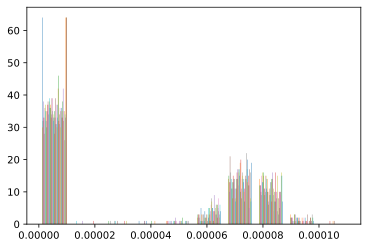

In [31]:
plt.hist(g)
plt.show

In [70]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
turnONRows = mat_contents['turnONRows']
turnONCols = mat_contents['turnONCols']
turnOFFRows = mat_contents['turnOFFRows']
turnOFFCols = mat_contents['turnOFFCols']
turnONRows=turnONRows[0]
turnONCols=turnONCols[0]

In [71]:
turnONRows[0:9]

array([ 2,  3,  5,  8,  9, 10, 11, 12, 13], dtype=uint8)

In [72]:
numDevices = np.size(turnONRows)
numDevices

1770

Array 0 , device (row= 2 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 0.00011062235255783641 Err= 1.0622352557836408e-05
Array 0 , device (row= 3 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 9.693711306614531e-05 Err= -3.0628869338546942e-06
Array 0 , device (row= 5 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 9.693711306614531e-05 Err= -3.0628869338546942e-06
Array 0 , device (row= 8 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 0.00011062235255783641 Err= 1.0622352557836408e-05
Array 0 , device (row= 9 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 0.00011062235255783641 Err= 1.0622352557836408e-05
Array 0 , device (row= 10 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 9.693711306614531e-05 Err= -3.0628869338546942e-06
Array 0 , device (row= 11 col= 1 ) Init G= 3.421309872922773e-08  Target G= 0.0001  Final G= 0.00011062235255783641 Err= 1.0622352557836408e-

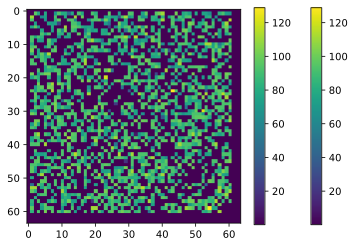

In [73]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
turnONRows = mat_contents['turnONRows']
turnONCols = mat_contents['turnONCols']
turnOFFRows = mat_contents['turnOFFRows']
turnOFFCols = mat_contents['turnOFFCols']

turnONRows=turnONRows[0]
turnONCols=turnONCols[0]
turnOFFRows=turnOFFRows[0]
turnOFFCols=turnOFFCols[0]

numDevices = np.size(turnONRows)
numOFFDevices = np.size(turnOFFRows)

VreadGate = 5.0
vRead = 0.2

arr = 0
startRow = 0
startCol = 0
numRows = 60
numCols = 60
GMin = 2e-6
GMax = 100e-6

targetGVal = GMax
targetGThresh = 4e-6

vAppliedSet = np.arange(0.5, 2.7, 0.08)
vAppliedReset = np.arange(0.5, 3.6, 0.1)
vGateSet = np.arange(0.6, 1.8, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

GHistory = []
VHistory = []

Vgate = 5
Vref = 0.5

for ii in range(numDevices):
    rr = turnONRows[ii]
    cc = turnONCols[ii]        
    thisGtarget = targetGVal
    thisGHistory = []
    thisVHistory = []
    thisGainHistory = []
    # Do a first read of this device
    rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
    currG = rdCurr/vRead
    thisGHistory.append(currG)
    thisVHistory.append(0)
    #print('Initial G=', currG, 'Target G =', thisGtarget)
    initG = currG
    # Now, if device is lower than target, SET it
    if currG < (thisGtarget-targetGThresh):
        for vgate in vGateSet:
            for vappset in vAppliedSet:
                # Apply vappset pulse, then read
                a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
                currG = rdCurr/vRead
                thisGHistory.append(currG)
                thisVHistory.append(vappset)
                if currG >= (thisGtarget-targetGThresh):
                    break
            if currG >= (thisGtarget-targetGThresh):
                break
        GHistory.append(thisGHistory)
        VHistory.append(thisVHistory)

    # Else, if device is higher than target, RESET it, then SET it
    elif currG > (thisGtarget+targetGThresh):
        for vgate in vGateReset:
            for vappreset in vAppliedReset:
                # Apply vappreset pulse, then read
                a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)

                rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)

                currG = rdCurr/vRead
                thisGHistory.append(currG)
                thisVHistory.append(-1*vappreset)
                if currG <= (thisGtarget+targetGThresh):
                    break
            if currG <= (thisGtarget+targetGThresh):
                break

        #Now if it is below Gtarget, then do SET operations; If it is above Gtarget, then Reset failed and device stuck ON
        
        #if currG <= thisGtarget and thisGtarget >= 2.5e-6:
        if currG <= (thisGtarget-targetGThresh):
            for vgate in vGateSet:
                for vappset in vAppliedSet:
                    # Apply vappset pulse, then read
                    a0.set_single_int(vappset, vgate, array=arr, row=rr, col=cc)

                    rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)                    
                    currG = rdCurr/vRead
                    thisGHistory.append(currG)
                    thisVHistory.append(vappset)
                    if currG >= (thisGtarget-targetGThresh):
                        break
                if currG >= (thisGtarget-targetGThresh):
                    break

    GHistory.append(thisGHistory)
    VHistory.append(thisVHistory)
    print('Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Target G=', thisGtarget, ' Final G=', currG, 'Err=', (currG-thisGtarget))

time.sleep(15)
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
Gmap0post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)        
            Gmap0post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0post)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='FtC_Hopfield60_Graph0_ARRAY0')


mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
turnOFFRows = mat_contents['turnOFFRows']
turnOFFCols = mat_contents['turnOFFCols']

turnOFFRows=turnOFFRows[0]
turnOFFCols=turnOFFCols[0]

numDevices = np.size(turnONRows)
numOFFDevices = np.size(turnOFFRows)

VreadGate = 5.0
vRead = 0.2

arr = 0
startRow = 0
startCol = 0
numRows = 60
numCols = 60
GMin = 3e-6
GMax = 100e-6

targetGValOFF = GMin
targetGThresh = 3e-6

vAppliedSet = np.arange(0.5, 2.7, 0.08)
vAppliedReset = np.arange(0.5, 3.6, 0.1)
vGateSet = np.arange(0.5, 1.8, 0.05)
vGateReset = np.arange(5.0, 5.5, 0.5)

GHistoryOFF = []
VHistoryOFF = []

Vgate = 5
Vref = 0.5


for ii in range(numOFFDevices):
    rr = turnOFFRows[ii]
    cc = turnOFFCols[ii]        
    thisGtarget = GMin
    thisGHistory = []
    thisVHistory = []
    thisGainHistory = []
    # Do a first read of this device
    rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)
    currG = rdCurr/vRead
    thisGHistory.append(currG)
    thisVHistory.append(0)
    #print('Initial G=', currG, 'Target G =', thisGtarget)
    initG = currG
    # Now, if device is lower than target, SET it
    if currG > (thisGtarget+targetGThresh):
        for vgate in vGateReset:
            for vappreset in vAppliedReset:
                # Apply vappreset pulse, then read
                a0.reset_single_int(vappreset, vgate, array=arr, row=rr, col=cc)

                rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)

                currG = rdCurr/vRead
                thisGHistory.append(currG)
                thisVHistory.append(-1*vappreset)
                if currG <= (thisGtarget+targetGThresh):
                    break
            if currG <= (thisGtarget+targetGThresh):
                break

    GHistoryOFF.append(thisGHistory)
    VHistoryOFF.append(thisVHistory)
    print('Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Target G=', thisGtarget, ' Final G=', currG, 'Err=', (currG-thisGtarget))


time.sleep(15)
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
Gmap0postOFF = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1)        
            Gmap0postOFF[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0postOFF)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='FtC_Hopfield60_Graph0_ARRAY0_OFF')

In [32]:
#plt.imshow(Gmap0postOFF)
#plt.colorbar()
plt.hist(Gmap0postOFF.reshape(-1,1), bins=50)
plt.show

NameError: name 'Gmap0postOFF' is not defined

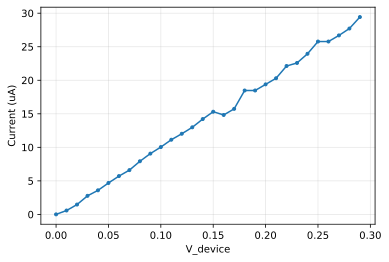

In [81]:
arr=0
rr=3
cc=1

Vreads = np.arange(0, 0.3, 0.01)
Vgate = 5
Vref = 0.5

volts = []
for vread in Vreads:
    #volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=3, Vref = Vref) )
    volts.append( a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1) )
plt.plot(Vreads, [i* 1e6 for i in volts], '.-')

plt.xlabel('V_device')
plt.ylabel('Current (uA)')
plt.grid(True, alpha=0.3)

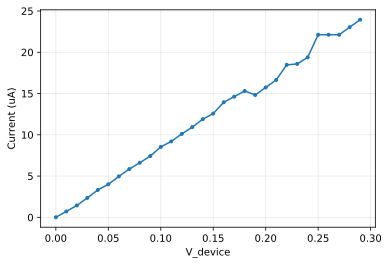

In [82]:
arr=0
rr=1
cc=3

Vreads = np.arange(0, 0.3, 0.01)
Vgate = 5
Vref = 0.5

volts = []
for vread in Vreads:
    #volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=3, Vref = Vref) )
    volts.append( a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1) )
plt.plot(Vreads, [i* 1e6 for i in volts], '.-')

plt.xlabel('V_device')
plt.ylabel('Current (uA)')
plt.grid(True, alpha=0.3)

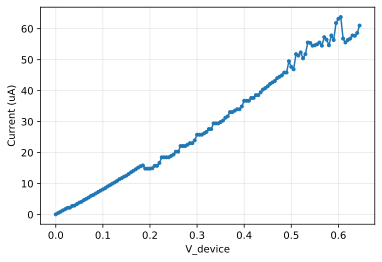

In [6]:
arr=0
rr=1
cc=3

Vreads = np.arange(0, 0.65,0.005)
Vgate = 5
Vref = 0.5

volts = []
for vread in Vreads:
    #volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=3, Vref = Vref) )
    volts.append( a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1) )
plt.plot(Vreads, [i* 1e6 for i in volts], '.-')

plt.xlabel('V_device')
plt.ylabel('Current (uA)')
plt.grid(True, alpha=0.3)

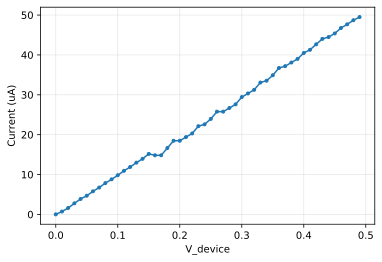

In [54]:
arr=0
rr=7
cc=15

Vreads = np.arange(0, 0.5,0.01)
Vgate = 5
Vref = 0.5

volts = []
for vread in Vreads:
    #volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=3, Vref = Vref) )
    volts.append( a0.read_single_int(vread, Vgate, array=arr, row=rr, col=cc, gain=-1) )
plt.plot(Vreads, [i* 1e6 for i in volts], '.-')

plt.xlabel('V_device')
plt.ylabel('Current (uA)')
plt.grid(True, alpha=0.3)

In [15]:
from lib_data import *
import scipy.io as sio
%load_workspace(vars(), '20190814-205207-CNN weights')
load_workspace(vars(),'20190831-225859-FtC_Hopfield60_Graph0_ARRAY0_OFF')

%plt.hist(Gmap0postOFF)
%plt.show

UsageError: Line magic function `%load_workspace(vars(),` not found.


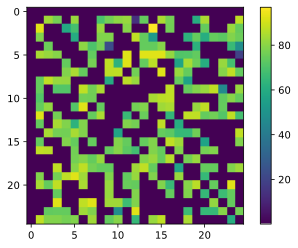

In [17]:
arr = 0
numRows = 25
numCols = 25
vRead = 0.2
vReadGate = 5.0
Gmap2post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, gain=-1)
            Gmap2post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2post)
plt.colorbar()

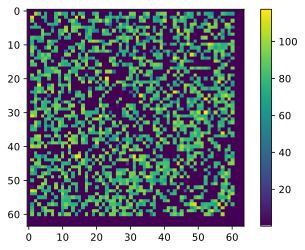

In [62]:
plt.imshow(Gmap)
plt.colorbar()

In [155]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib
import matplotlib.pyplot as plt
from dpe import DPE
from lib_data import *
from lib_nn_dpe import NN_dpe
from IPython import display

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
CMat = mat_contents['A']

dpe.N_BIT = 1

numTests = 500
appliedVector1 = np.zeros((64,numTests))
appliedVector2 = np.zeros((64,numTests))
randomVector = np.random.randint(2, size=(60,numTests))

appliedVector1[1:61,:] = randomVector[:,:]
appliedVector2[1:61,:] = 1-randomVector[:,:]
neuronVector = appliedVector1[1:61,:] - appliedVector2[1:61,:]

output1  = dpe.multiply_w_delay(0, appliedVector1, c_sel=[1, 61], mode=1, debug=False, delay=5)
output2  = dpe.multiply_w_delay(0, appliedVector2, c_sel=[1, 61], mode=1, debug=False, delay=5)
output = output1 - output2
#SW_output = neuronVector * CMat
#SW_output = np.matmul(neuronVector, CMat)
SW_output = (CMat.T @ neuronVector).T 

for c in range(60):
    y = output[:,c]
    x = SW_output[:,c]
    plt.plot(x,y,'.')

new_lin_corr = []
for c in range(60):
    new_lin_corr.append( np.polyfit(output[:,c], SW_output[:,c], 1))

output_corr = lin_corr(output, new_lin_corr)
error = output_corr - SW_output
for c in range(60):
    x = SW_output[:,c]
    y = output_corr[:,c]
    
    plt.plot(x,y,'.')

Running <function DPE.multiply_w_delay at 0x10452348> with serial
[INFO] Elapsed time = 3.06s
Serial disconnected
Running <function DPE.multiply_w_delay at 0x10452348> with serial
[INFO] Elapsed time = 2.97s
Serial disconnected


In [165]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib
import matplotlib.pyplot as plt
from dpe import DPE
from lib_data import *
from lib_nn_dpe import NN_dpe
from IPython import display

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
CMat = mat_contents['A']

dpe.N_BIT = 1

numTests = 500
appliedVector1 = np.zeros((64,numTests))
appliedVector2 = np.zeros((64,numTests))
randomVector = np.random.randint(2, size=(60,numTests))

appliedVector1[1:61,:] = randomVector[:,:]
appliedVector2[1:61,:] = 1-randomVector[:,:]
neuronVector = appliedVector1[1:61,:] - appliedVector2[1:61,:]

output1  = dpe.multiply_w_delay(0, appliedVector1, c_sel=[1, 61], mode=1, debug=False, delay=5)
#output2  = dpe.multiply_w_delay(0, appliedVector2, c_sel=[1, 61], mode=1, debug=False, delay=5)
output = output1
#SW_output = neuronVector * CMat
#SW_output = np.matmul(neuronVector, CMat)
SW_output = (CMat.T @ appliedVector1).T 

for c in range(60):
    y = output[:,c]
    x = SW_output[:,c]
    plt.plot(x,y,'.')

new_lin_corr2 = []
for c in range(60):
    new_lin_corr2.append( np.polyfit(output[:,c], SW_output[:,c], 1))

output_corr = lin_corr(output, new_lin_corr2)
error = output_corr - SW_output
for c in range(60):
    x = SW_output[:,c]
    y = output_corr[:,c]
    
    plt.plot(x,y,'.')

Running <function DPE.multiply_w_delay at 0x10452348> with serial
[INFO] Elapsed time = 100.65s
Serial disconnected


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 60)

In [166]:
SW_output = (CMat.T @ appliedVector1[1:61,:]).T 

for c in range(60):
    y = output[:,c]
    x = SW_output[:,c]
    plt.plot(x,y,'.')

new_lin_corr2 = []
for c in range(60):
    new_lin_corr2.append( np.polyfit(output[:,c], SW_output[:,c], 1))

output_corr = lin_corr(output, new_lin_corr2)
error = output_corr - SW_output
for c in range(60):
    x = SW_output[:,c]
    y = output_corr[:,c]
    
    plt.plot(x,y,'.')

MemoryError: 

<Figure size 432x288 with 1 Axes>

In [ ]:
#Function to run the hopfield network

numCycles = 5
threshold = 0
noise = 0
numCols = 60

energyHistory = np.zeros(numCycles*numCols+1)
appliedVector1 = np.zeros((64,1))
appliedVector2 = np.zeros((64,1))

randomVector = np.random.randint(2, size=(60,1))

appliedVector1[1:61,:] = randomVector[:,:]
appliedVector2[1:61,:] = 1-randomVector[:,:]
neuronVector = appliedVector1[1:61,:] - appliedVector2[1:61,:]

energyHistory[0]= 0.5*np.dot(neuronVector.T, (CMat @ neuronVector))

for cc in np.arange(numCycles):
    randOrderColumns = np.random.shuffle(np.arange(60))
    for ii in randOrderColumns:
        output1  = dpe.multiply_w_delay(0, appliedVector1, c_sel=[1, 61], mode=1, debug=False, delay=5)
        output2  = dpe.multiply_w_delay(0, appliedVector2, c_sel=[1, 61], mode=1, debug=False, delay=5)
        output = output1[ii] - output2[ii]
        output_corr = noise + lin_corr(output, new_lin_corr)
        if (output_corr >= threshold):
            appliedVector1[1+ii,0] = 1
            appliedVector2[1+ii,0] = 0
            neuronVector[ii] = 1
        else:
            appliedVector1[1+ii,0] = 0
            appliedVector2[1+ii,0] = 1
            neuronVector[ii] = -1
        energyHistory[60*cc+ii+1]= 0.5*np.dot(neuronVector.T, (CMat @ neuronVector))



#SW_output = neuronVector * CMat
#SW_output = np.matmul(neuronVector, CMat)
SW_output = (CMat.T @ neuronVector).T 

for c in range(60):
    y = output[:,c]
    x = SW_output[:,c]
    plt.plot(x,y,'.')

new_lin_corr = []
for c in range(60):
    new_lin_corr.append( np.polyfit(output[:,c], SW_output[:,c], 1))

output_corr = lin_corr(output, new_lin_corr)
error = output_corr - SW_output
for c in range(60):
    x = SW_output[:,c]
    y = output_corr[:,c]
    
    plt.plot(x,y,'.')

In [164]:
randomVector = np.random.randint(2, size=(60,1))
res1 = CMat @ randomVector
res = np.dot(randomVector.T,res1)
print(np.shape(res))

(1, 1)


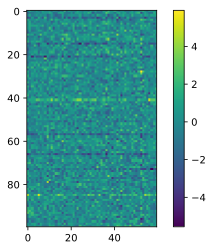

In [154]:
plt.imshow(error)
plt.colorbar()

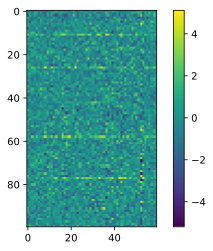

In [152]:
plt.imshow(error)
plt.colorbar()

In [146]:
def lin_corr(outputs, factors):
    result = np.zeros(outputs.shape)
    for c in range(outputs.shape[1]):
        result[:,c] = outputs[:,c] * factors[c][0] + factors[c][1]
        
    return result

In [141]:
np.shape(SW_output)

(1, 60)

In [124]:
a = np.array([[1, 0],
...               [1, 1]])
b = np.array([1, 2])
np.matmul(b, a)

array([3, 2])

In [128]:
#software = (CMat.T @ neuronVector).T
software = np.matmul(neuronVector, CMat)
np.shape(software)

(60,)

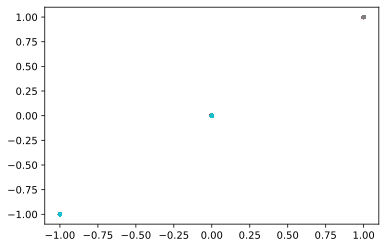

In [127]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
CMat = mat_contents['A']

appliedVector1 = np.zeros((64,1))
appliedVector2 = np.zeros((64,1))
randomVector = np.random.randint(2, size=(60,1))

appliedVector1[1:61,0] = randomVector[:,0]
appliedVector2[1:61,0] = 1-randomVector[:,0]
neuronVector = appliedVector1[1:61,0] - appliedVector2[1:61,0]

SW_output = neuronVector * CMat
#SW_output = np.matmul(neuronVector, CMat)

for c in range(60):
    x = SW_output[:,c]
    y = SW_output[:,c]
    plt.plot(x,y,'.')

In [72]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib
import matplotlib.pyplot as plt
from dpe import DPE
from lib_data import *
from lib_nn_dpe import NN_dpe
from IPython import display

dpe.N_BIT = 1

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
AMatrix = mat_contents['A']

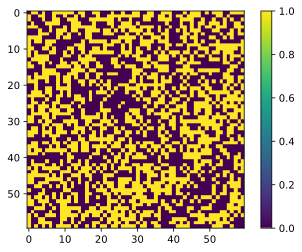

In [84]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
CMat = mat_contents['A']
GMin = 2e-6
GMax = 100e-6
targetGMatrix = CMat
targetGMatrix[targetGMatrix>0.5]=GMax
targetGMatrix[targetGMatrix<0.5]=GMin
plt.imshow(targetGMatrix)
plt.colorbar()

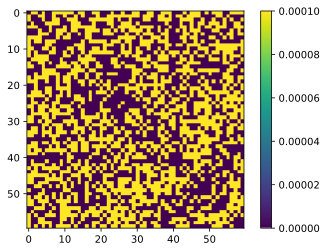

In [95]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
CMat = mat_contents['A']
targetGMatrix = CMat
newM = GMax* targetGMatrix * (targetGMatrix>0.5) + GMin* targetGMatrix * (targetGMatrix<0.5)
plt.imshow(newM)
plt.colorbar()

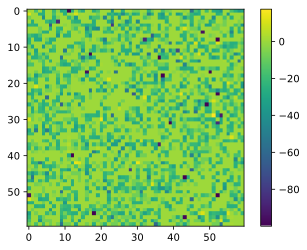

In [101]:
GMin = 2e-6
GMax = 100e-6

from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
CMat = mat_contents['A']
targetGMatrix = GMax* CMat * (CMat>0.5) + GMin* CMat * (CMat<0.5)

errorG = Gmap[1:61,1:61] - 1e6*targetGMatrix
plt.imshow(errorG)
plt.colorbar()

In [61]:
appliedVector = np.zeros((64,1))
randomVector = np.random.randint(2, size=(60,1))
appliedVector[1:61,0] = randomVector[:,0]
print(appliedVector)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
